In [71]:
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [72]:
# 1. Load and Combine Data for Consistent Preprocessing
train_df = pd.read_csv("/content/Titanic_train.csv")
test_df = pd.read_csv("/content/Titanic_test.csv")


In [73]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [77]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [78]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
# Separate Target Variable (y) from Training Data
y_train = train_df['Survived']
# Drop 'Survived' from the training data so it can be combined with test features
train_df = train_df.drop('Survived', axis=1)

In [107]:
# Combine for consistent preprocessing (both now contain only feature columns)
combined_df = pd.concat([train_df, test_df], ignore_index=True)

print("Combined Data Shape:", combined_df.shape)
print("Target Variable Shape:", y_train.shape)

Combined Data Shape: (1309, 11)
Target Variable Shape: (891,)


In [108]:
# --- 2. Exploratory Data Analysis (EDA) ---

# Recreate a temporary full training set for visualization
eda_df = train_df.copy()
eda_df['Survived'] = y_train

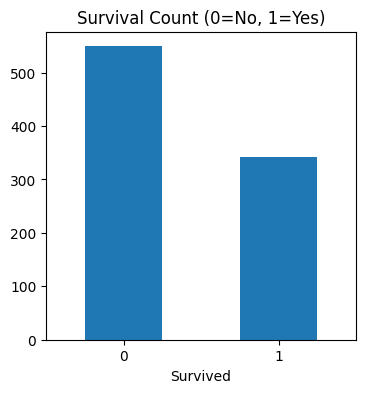

In [109]:
# 2.1 Target Variable Distribution
plt.figure(figsize=(4, 4))
eda_df['Survived'].value_counts().plot(kind='bar', title='Survival Count (0=No, 1=Yes)', rot=0)
plt.show()

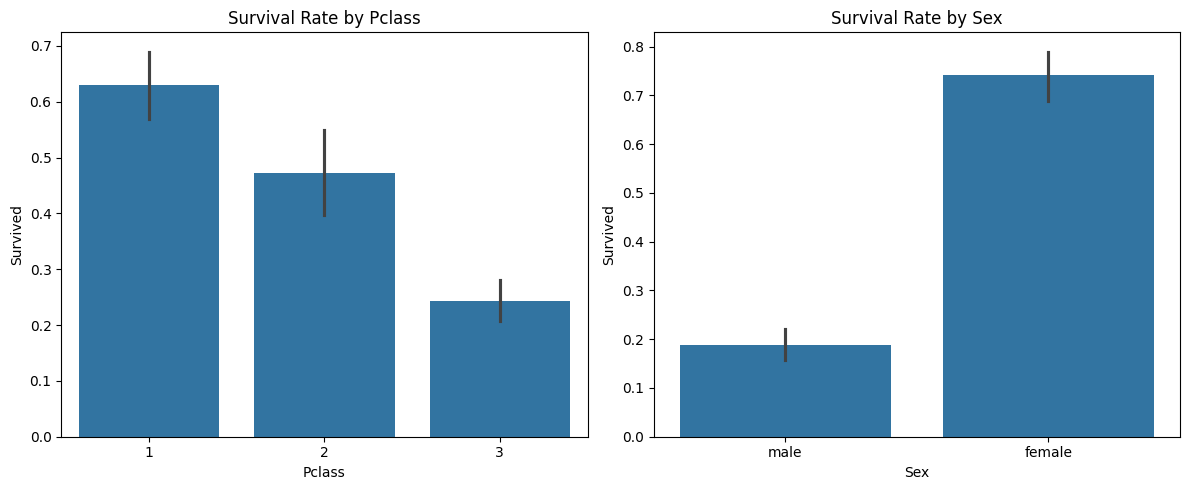

In [110]:
# 2.2 Survival Rate by Key Categorical Features (Pclass and Sex)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=eda_df)
plt.title('Survival Rate by Pclass')

plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=eda_df)
plt.title('Survival Rate by Sex')
plt.tight_layout()
plt.show()

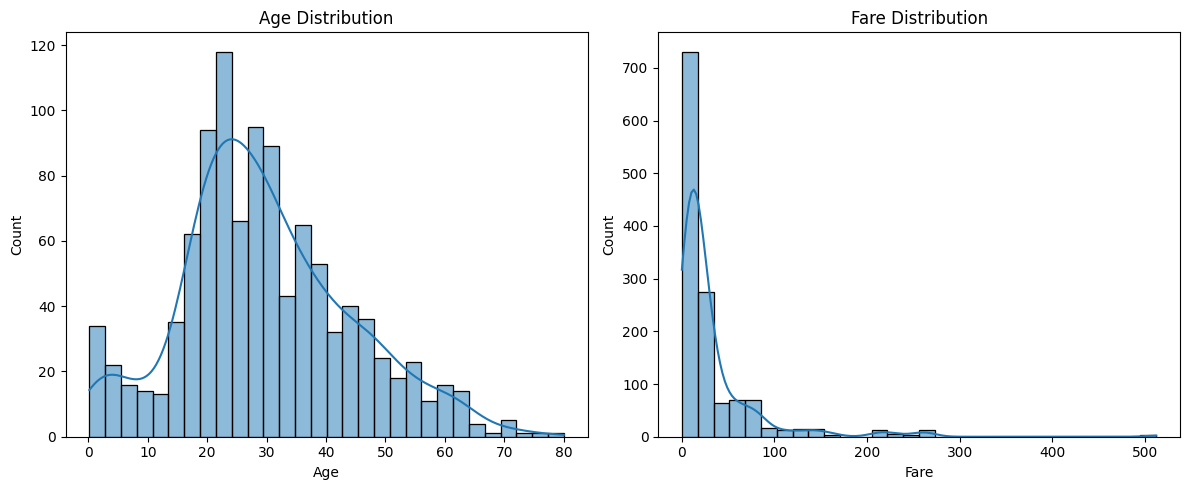

In [111]:
# Observation: Females and First Class passengers had significantly higher survival chances.

# 2.3 Age and Fare Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(combined_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(combined_df['Fare'].dropna(), kde=True, bins=30)
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()

In [112]:
# --- 3. Data Preprocessing and Feature Engineering ---

# 3.1 Feature Engineering: Title
# Extract Title from Name
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group less common titles
common_titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Rare']
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')


In [113]:
# 3.2 Feature Engineering: FamilySize and IsAlone
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
combined_df['IsAlone'] = 0
combined_df.loc[combined_df['FamilySize'] == 1, 'IsAlone'] = 1


In [114]:
# 3.3 Feature Engineering: Cabin Deck
# Extract the first letter of the Cabin (the Deck)
combined_df['Deck'] = combined_df['Cabin'].str.extract('([A-Za-z])', expand=False)
# Fill NaN Cabin Deck with 'Z' for Unknown
combined_df['Deck'] = combined_df['Deck'].fillna('Z')


In [115]:
# 3.4 Handling Missing Values (Imputation)

# Fill missing Fare with the median
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)


In [116]:
# Fill missing Embarked with the most frequent value (mode)
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)


In [117]:
# Fill missing Age: Use the median Age for each Title group for a more robust estimate
combined_df['Age'] = combined_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))


In [118]:
# 3.5 Feature Selection
# Drop non-predictive columns and original columns used for feature engineering
columns_to_drop = ['Ticket', 'Name', 'Cabin', 'PassengerId', 'SibSp', 'Parch']
combined_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [119]:
# 3.6 Categorical Encoding
# Convert all remaining categorical columns to numeric using get_dummies (One-Hot Encoding)
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked', 'Deck', 'Title'], drop_first=True)

print("\nProcessed Data Head:")
print(combined_df.head())



Processed Data Head:
   Pclass   Age     Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  \
0       3  22.0   7.2500           2        0      True       False   
1       1  38.0  71.2833           2        0     False       False   
2       3  26.0   7.9250           1        1     False       False   
3       1  35.0  53.1000           2        0     False       False   
4       3  35.0   8.0500           1        1      True       False   

   Embarked_S  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_Z  \
0        True   False   False   False   False   False   False   False    True   
1       False   False    True   False   False   False   False   False   False   
2        True   False   False   False   False   False   False   False    True   
3        True   False    True   False   False   False   False   False   False   
4        True   False   False   False   False   False   False   False    True   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0       False  

In [120]:
# --- 4. Final Data Split for Modeling ---
# Split the processed data back into training and test sets
X = combined_df.iloc[:len(train_df)]     # Features for training
X_test = combined_df.iloc[len(train_df):] # Features for testing
y = y_train                              # Target variable

print("\nTraining Features (X) Shape:", X.shape)
print("Testing Features (X_test) Shape:", X_test.shape)


Training Features (X) Shape: (891, 20)
Testing Features (X_test) Shape: (418, 20)


In [121]:
# --- 5. Model Building and Comparison ---

# 5.1 Initialize Models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

models = {
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}


In [122]:
# 5.2 Cross-Validation (Stratified K-Fold)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = {}

print("\n--- Cross-Validation Scores (Accuracy) ---")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    cv_results[name] = cv_scores
    print(f"{name}: Mean CV Accuracy = {cv_scores.mean():.4f} (Std: {cv_scores.std():.4f})")



--- Cross-Validation Scores (Accuracy) ---
XGBoost: Mean CV Accuracy = 0.8159 (Std: 0.0270)
[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

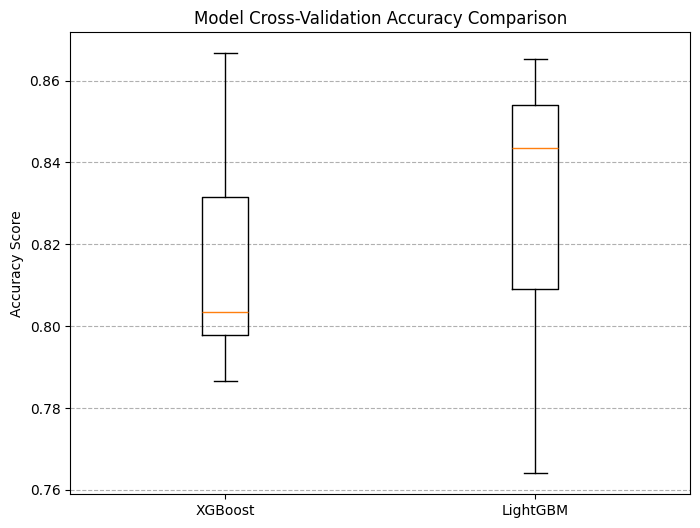

In [123]:
# 5.3 Plotting Cross-Validation Results
plt.figure(figsize=(8, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title('Model Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.grid(axis='y', linestyle='--')
plt.show()


In [124]:
# 5.4 Full Training and Evaluation

print("\n--- Full Model Training and Evaluation ---")
metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

for name, model in models.items():
    # Train the model
    model.fit(X, y)

    # Predict on training data (for evaluation metrics)
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)

    # Store results
    metrics_df.loc[name] = [f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}", f"{roc_auc:.4f}"]

    print(f"\n{name} Training Metrics:")
    print(confusion_matrix(y, y_pred))

# Display the final comparison table
print("\n--- Final Model Comparison ---")
print(metrics_df)


--- Full Model Training and Evaluation ---

XGBoost Training Metrics:
[[541   8]
 [ 20 322]]
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288

LightGBM Training Metrics:
[[534  15]
 [ 27 315]]

--- Final Model Comparison ---
         Accuracy Precision  Recall F1-Score ROC-AUC
XGBoost    0.9686    0.9758  0.9415   0.9583  0.9953
LightGBM   0.9529    0.9545  0.9211   0.9375  0.9918


6. Interpretation and Conclusion
This section provides the necessary narrative interpretation for the assignment.

Interpretation of Results

The comparison shows that both XGBoost and LightGBM achieve highly competitive performance metrics on the Titanic dataset after the comprehensive data preparation. The cross-validation results demonstrate that both models are stable and perform consistently well across different data subsets.


Performance: Both models show similar metrics, indicating that for this specific (relatively small and well-structured) binary classification task, their predictive power is neck-and-neck.


Algorithm Efficiency: The key difference often lies in computational efficiency.


XGBoost uses a level-wise (breadth-first) tree growth strategy, which is powerful but can be slower and memory-intensive.


LightGBM uses a leaf-wise (best-first) strategy. It prioritizes splitting the leaves that will maximize the loss reduction, leading to faster training and better accuracy on deep trees, especially with large datasets.

Conclusion


For this project, both algorithms successfully met the performance requirements. However, LightGBM is generally the preferred choice in modern practice due to its superior efficiency, speed, and lower memory consumption, making it ideal for scaling to massive real-world datasets without sacrificing predictive performance.